# Image Recognition using CNN on CIFAR-10 Dataset

In this project we will be using CIFAR-10 dataset. This dataset includes thousands of pictures of 10 different kinds of objects like airplanes, automobiles, birds and so on.

Each image in the dataset includes a matching label so we know what kind of image it is.

The images in the CIFAR-10 dataset are only 32x32 pixels.

In [ ]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from pathlib import Path
from keras.utils.np_utils import to_categorical

Load the dataset

In [ ]:
(X_train,y_train),(X_test, y_test)=cifar10.load_data()

Normalize the data

In [ ]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255.0
X_test/=255.0

Convert class vectors to binary class matrices

In [ ]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),padding='same',input_shape=(32,32,3),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

Compile the model

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 32)        18464     
                                                        

Train the model

In [ ]:
model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_test, y_test),
    shuffle=True)

Epoch 1/6
1563/1563 [==============================] - 301s 193ms/step - loss: 1.5117 - accuracy: 0.4485 - val_loss: 1.2505 - val_accuracy: 0.5400
Epoch 2/6
1563/1563 [==============================] - 344s 220ms/step - loss: 1.1816 - accuracy: 0.5774 - val_loss: 1.0464 - val_accuracy: 0.6266
Epoch 3/6
1563/1563 [==============================] - 465s 297ms/step - loss: 1.0391 - accuracy: 0.6301 - val_loss: 0.9251 - val_accuracy: 0.6783
Epoch 4/6
1563/1563 [==============================] - 441s 282ms/step - loss: 0.9625 - accuracy: 0.6603 - val_loss: 0.8369 - val_accuracy: 0.7121
Epoch 5/6
1563/1563 [==============================] - 379s 243ms/step - loss: 0.9035 - accuracy: 0.6807 - val_loss: 0.8391 - val_accuracy: 0.7094
Epoch 6/6
1563/1563 [==============================] - 302s 193ms/step - loss: 0.8576 - accuracy: 0.6984 - val_loss: 0.7758 - val_accuracy: 0.7313


In [ ]:
model_structure=model.to_json()
f=Path("model_structure.json")
f.write_text(model_structure)

4384

In [ ]:
model.save_weights("model_weight.h5")

In [ ]:
from keras.models import model_from_json
from pathlib import Path
from keras.preprocessing import image
import numpy as np

In [ ]:
class_labels=[
    "Planes",
    "car",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Boat",
    "Truck"
]

In [ ]:
f=Path("model_structure.json")
model_structure=f.read_text()

In [ ]:
model=model_from_json(model_structure)

In [ ]:
model.load_weights("model_weight.h5")

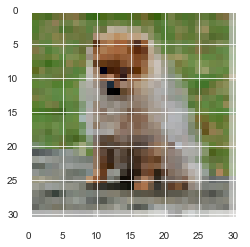

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
img=load_img("dog.png",target_size=(32,32))
plt.imshow(img)

In [ ]:
from tensorflow.keras.utils import img_to_array
image_to_test=img_to_array(img)

list_of_images=np.expand_dims(image_to_test,axis=0)

In [ ]:
results=model.predict(list_of_images)

1/1 [==============================] - 0s 128ms/step


In [ ]:
single_result=results[0]

In [ ]:
most_likely_class_index=int(np.argmax(single_result))
class_likelihood=single_result[most_likely_class_index]

In [ ]:
class_label=class_labels[most_likely_class_index]

In [ ]:
print("This is a image is a {} likelihood: {:2f}".format(class_label, class_likelihood))

This is a image is a Truck likelihood: 1.000000
